In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [74]:
df_A = pd.read_csv("Datasets\df_A.csv")
df_B = pd.read_csv("Datasets\df_B.csv")

In [75]:
# List of DataFrame names for location_A
df_names_A = [
    "A1_df", "A2_df", "A3_df", "A5_df", "A12_df", "A19_df", "A20_df", 
    "A23_df", "A24_df", "A25_df", "A26_df", "A27_df", "A28_df", 
    "A32_df", "A34_df", "A36_df", "A37_df", "A39_df", "A42_df", 
    "A43_df", "A44_df", "A45_df"
]

# Dictionary to store the imported DataFrames
location_A = {}

# Load each CSV file into a DataFrame
for df_name in df_names_A:
    csv_filename = f"Datasets\{df_name}.csv"
    location_A[df_name] = pd.read_csv(csv_filename)

In [76]:
# List of DataFrame names for location_B
df_names_B = [
    "B4_df", "B6_df", "B8_df", "B9_df", "B10_df", "B11_df", "B13_df", 
    "B14_df", "B15_df", "B16_df", "B17_df", "B18_df", "B21_df", 
    "B29_df", "B30_df", "B31_df", "B33_df", "B35_df", "B38_df", 
    "B40_df", "B41_df"
]

# Dictionary to store the imported DataFrames
location_B = {}

# Load each CSV file into a DataFrame
for df_name in df_names_B:
    csv_filename = f"Datasets\{df_name}.csv"
    location_B[df_name] = pd.read_csv(csv_filename)

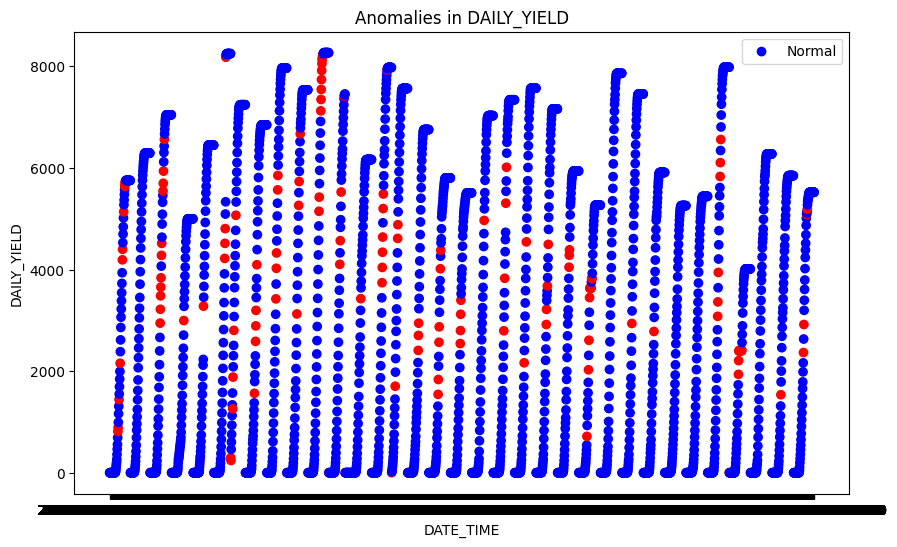

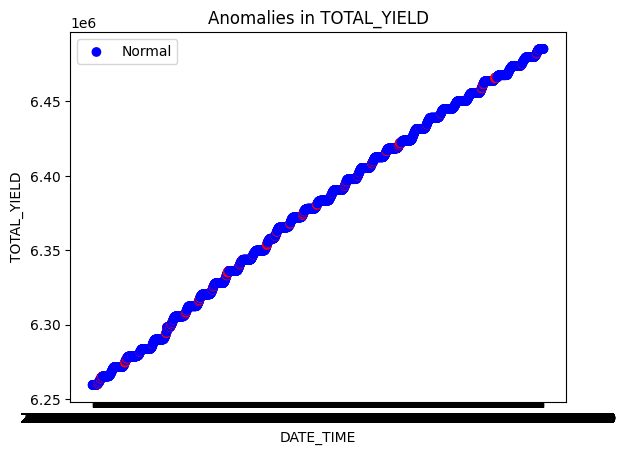

In [123]:
# Select relevant features for anomaly detection
features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
            'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'TOTAL_YIELD_diff', 'DAILY_YIELD_diff']

df = location_A['A1_df'].copy()
# df = df[(df['DATE'] == '2020-05-22')]

# Prepare the data
data = df[features].fillna(0)  # Fill missing values with 0
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Scale the data for better performance

# Initialize and fit the IsolationForest model
isolation_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=0, max_samples=0.7)
df['anomaly_score'] = isolation_forest.fit_predict(data_scaled)

# Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Filter for anomalies
anomalies = df[df['is_anomaly'] == 'Anomaly']

# Save the anomalies to a CSV
# anomalies.to_csv('anomalies.csv', index=False)


plt.figure(figsize=(10, 6))
plt.scatter(df['DATE_TIME'], df['DAILY_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('DAILY_YIELD')
plt.title('Anomalies in DAILY_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['TOTAL_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('TOTAL_YIELD')
plt.title('Anomalies in TOTAL_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

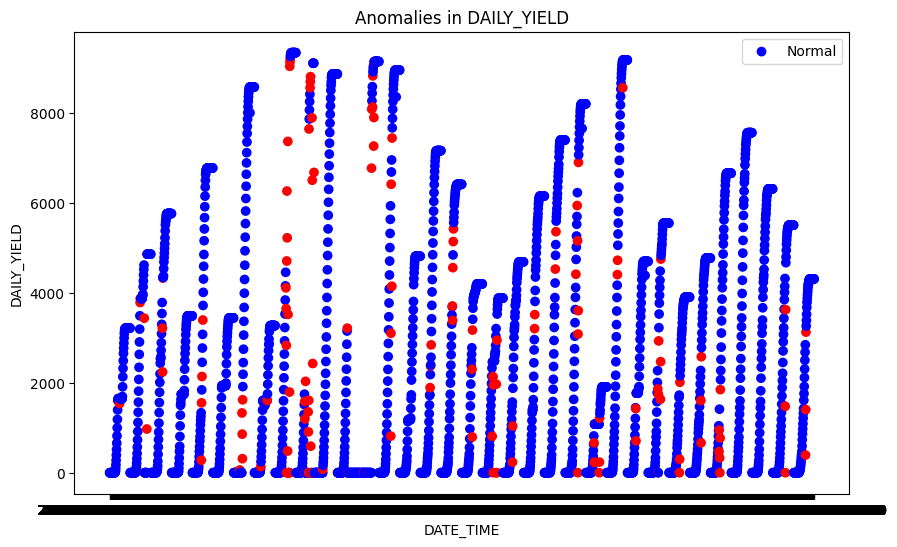

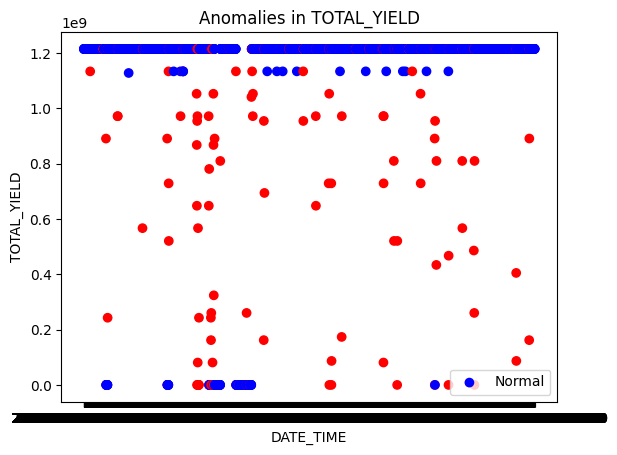

In [124]:
# Select relevant features for anomaly detection
features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
            'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'TOTAL_YIELD_diff', 'DAILY_YIELD_diff']

df = location_B['B6_df'].copy()
# df = df[(df['DATE'] == '2020-05-22')]

# Prepare the data
data = df[features].fillna(0)  # Fill missing values with 0
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Scale the data for better performance

# Initialize and fit the IsolationForest model
isolation_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=0, max_samples=0.7)
df['anomaly_score'] = isolation_forest.fit_predict(data_scaled)

# Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Filter for anomalies
anomalies = df[df['is_anomaly'] == 'Anomaly']

# Save the anomalies to a CSV
# anomalies.to_csv('anomalies.csv', index=False)


plt.figure(figsize=(10, 6))
plt.scatter(df['DATE_TIME'], df['DAILY_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('DAILY_YIELD')
plt.title('Anomalies in DAILY_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['TOTAL_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('TOTAL_YIELD')
plt.title('Anomalies in TOTAL_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

In [118]:
# Filter for anomalies
anomalies = df[df['is_anomaly'] == 'Anomaly']
anomalies

,DATE_TIME,DATE,TIME,DC_POWER,AC_POWER,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,anomaly_score,is_anomaly
46,2020-05-15 11:30:00,2020-05-15,11:30:00,0.000000,0.000000,1535.333333,-109.666667,1.134262e+09,-8.101869e+07,34.651455,56.083953,0.987932,-1,Anomaly
47,2020-05-15 11:45:00,2020-05-15,11:45:00,0.000000,0.000000,1645.000000,109.666667,1.215280e+09,8.101869e+07,35.151526,55.593795,0.953345,-1,Anomaly
139,2020-05-16 11:00:00,2020-05-16,11:00:00,1205.326667,1175.186667,3191.400000,286.542857,1.215285e+09,2.865429e+02,34.151093,61.634741,0.919857,-1,Anomaly
140,2020-05-16 11:15:00,2020-05-16,11:15:00,1213.920000,1183.566667,3487.666667,296.266667,1.215285e+09,2.962667e+02,34.838312,62.845889,0.930322,-1,Anomaly
141,2020-05-16 11:30:00,2020-05-16,11:30:00,928.700000,905.486667,3782.666667,295.000000,1.215286e+09,2.950000e+02,34.830906,63.092099,0.981039,-1,Anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,2020-06-16 14:30:00,2020-06-16,14:30:00,0.000000,0.000000,0.000000,-1476.133333,8.682003e+07,-3.183401e+08,30.833513,44.376507,0.562944,-1,Anomaly
3126,2020-06-16 14:45:00,2020-06-16,14:45:00,586.940000,574.853333,3623.466667,3623.466667,1.215481e+09,1.128660e+09,30.503410,41.550000,0.447018,-1,Anomaly
3218,2020-06-17 13:45:00,2020-06-17,13:45:00,121.613333,118.966667,392.533333,-2450.600000,1.620646e+08,-1.053420e+09,28.731198,40.460310,0.578941,-1,Anomaly
3219,2020-06-17 14:00:00,2020-06-17,14:00:00,382.133333,374.213333,1403.066667,1010.533333,8.913553e+08,7.292907e+08,29.044236,42.326256,0.480736,-1,Anomaly
